In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df=pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [128]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# Ask1 : The most sold branch And how much


**Ask1 : The most sold branch And how much**


In [129]:
type_branch= df.groupby('Branch')
type_branch['Total'].describe ()

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
A,340.0,312.354031,231.640025,12.6945,137.489625,240.82800,459.340875,1039.29
B,332.0,319.872506,242.447565,18.6375,119.936250,252.88200,465.585750,1022.49
C,328.0,337.099715,263.160870,10.6785,121.474500,271.41975,495.754875,1042.65


The most sold branch C sold count 328 => 1042.65 $

The least sold branch B sold count 332.0 => 1022.49 $

**Ask2 : The most sold city**


In [130]:
type_branch= df.groupby('Branch')
type_branch['City'].describe ()

,count,unique,top,freq
Branch,,,,
A,340,1,Yangon,340
B,332,1,Mandalay,332
C,328,1,Naypyitaw,328


In [131]:
type_branch['City'].nunique()

Branch
A    1
B    1
C    1
Name: City, dtype: int64

**# There are three branches of each branch in the city**

# 


# Ask2 : Who is the most bought? Female Or Male

In [132]:
  df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

<Axes: ylabel='Gender'>

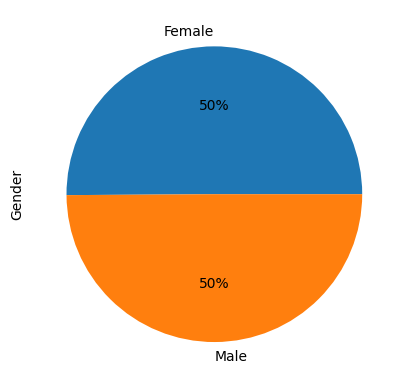

In [133]:
df['Gender'].value_counts().plot.pie(autopct='%1.00000000f%%')

**Gender : Almost equal**




# Ask3 : Each branch has more Male or Female

In [134]:
type_branch['Gender'].value_counts()

Branch  Gender
A       Male      179
        Female    161
B       Male      170
        Female    162
C       Female    178
        Male      150
Name: Gender, dtype: int64

<Axes: xlabel='Branch,Gender'>

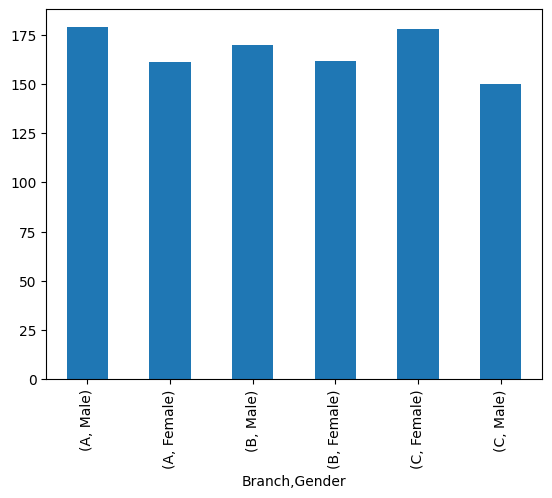

In [135]:
type_branch['Gender'].value_counts().plot.bar()

**in branch (A) The most Gender : Male**

**in branch (B) The most Gender : Male**

**in branch (C) The most Gender : Female**

# Ask4 : The most Payment method in general + each branch which more payment method

## The most Payment method in general


In [136]:
df['Payment'].describe()

count        1000
unique          3
top       Ewallet
freq          345
Name: Payment, dtype: object

In [137]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [138]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<Axes: ylabel='Payment'>

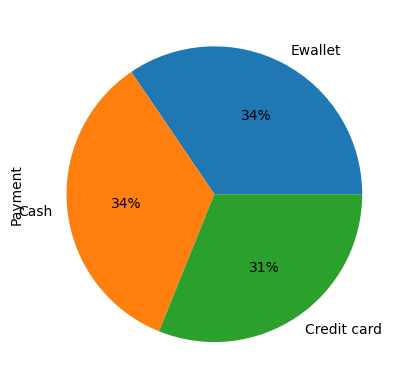

In [139]:
df['Payment'].value_counts().plot.pie(autopct='%1.0f%%')

**The most Payment method in general : Ewallet = 345 times**

## each branch which more payment method


In [140]:
type_branch= df.groupby('Branch')

type_branch['Payment'].value_counts()

Branch  Payment    
A       Ewallet        126
        Cash           110
        Credit card    104
B       Ewallet        113
        Cash           110
        Credit card    109
C       Cash           124
        Ewallet        106
        Credit card     98
Name: Payment, dtype: int64

<Axes: xlabel='Branch,Payment'>

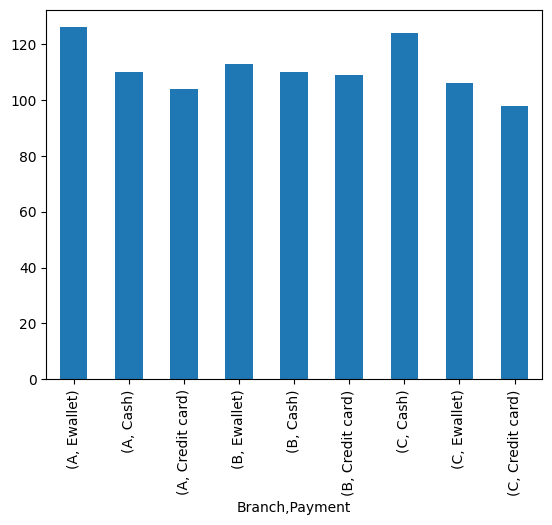

In [141]:
type_branch['Payment'].value_counts().plot.bar()

**in branch (A) The most Payment : Ewallet => 126 times**

**in branch (B) The most Payment : Ewallet => 113 times**

**in branch (C) The most Payment : Cash => 124 times**

# Ask5 : Members or normal people who buy more

In [142]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

**Members more than normal people in the purchase**

# Ask6 : The most selling production line

In [143]:
Product_line_group =df.groupby('Product line')
Product_line_group.describe()


Unit price                                        \
                            count       mean        std    min      25%   
Product line                                                              
Electronic accessories      170.0  53.551588  26.748102  10.56  27.9825   
Fashion accessories         178.0  57.153652  26.666294  10.18  35.5200   
Food and beverages          174.0  56.008851  26.270242  10.13  33.4675   
Health and beauty           152.0  54.854474  26.353058  10.08  32.4250   
Home and lifestyle          160.0  55.316937  26.206963  10.53  34.3125   
Sports and travel           166.0  56.993253  26.905015  10.17  34.4175   

                                               Quantity            ...  \
                           50%      75%    max    count      mean  ...   
Product line                                                       ...   
Electronic accessories  51.505  75.9025  99.73    170.0  5.711765  ...   
Fashion accessories     55.090  81.1025  99.89    178.0  5.067416  ...   
Food and beverages      53.995  78.7375  99.79    174.0  5.471264  ...   
Health and beauty       57.405  76.1350  99.96    152.0  5.618421  ...   
Home and lifestyle      55.590  77.5225  99.92    160.0  5.693750  ...   
Sports and travel       58.650  80.6800  99.96    166.0  5.542169  ...   

                       gross income          Rating                           \
                                75%      max  count      mean       std  min   
Product line                                                                   
Electronic accessories    22.658250  44.8785  170.0  6.924706  1.702028  4.0   
Fashion accessories       21.080500  49.6500  178.0  7.029213  1.713437  4.0   
Food and beverages        21.554625  49.2600  174.0  7.113218  1.715181  4.0   
Health and beauty         23.462875  45.2500  152.0  7.003289  1.763817  4.0   
Home and lifestyle        23.417250  48.7500  160.0  6.837500  1.718627  4.1   
Sports and travel         22.746875  47.7200  166.0  6.916265  1.714477  4.0   

                                                 
                          25%   50%   75%   max  
Product line                                     
Electronic accessories  5.500  6.70  8.35  10.0  
Fashion accessories     5.600  6.95  8.50   9.9  
Food and beverages      5.800  7.30  8.60   9.9  
Health and beauty       5.450  7.20  8.40  10.0  
Home and lifestyle      5.400  7.00  8.20   9.9  
Sports and travel       5.525  6.70  8.45  10.0  

[6 rows x 64 columns]

In [144]:
Product_line_group['Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,170.0,319.632538,245.945626,26.7225,118.503000,241.21650,475.823250,942.4485
Fashion accessories,178.0,305.089298,243.564130,12.6945,106.155000,211.64850,442.690500,1042.6500
Food and beverages,174.0,322.671517,247.157780,22.6590,134.904000,252.48825,452.647125,1034.4600
Health and beauty,152.0,323.643020,237.538815,18.6375,125.666625,272.30700,492.720375,950.2500
Home and lifestyle,160.0,336.636956,254.600671,14.6790,126.076125,258.18975,491.762250,1023.7500
Sports and travel,166.0,332.065220,248.375328,10.6785,133.260750,270.93150,477.684375,1002.1200


In [145]:
Product_line_group['Total'].sum()

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

**The best-selling product line in terms of number of sales is ( Fashion accessories ) => 178 times**

**Nd**

**The best-selling product line in terms of amount is ( Electronic accessories ) =>  54337.5315  $**

# Ask7 : In which month did we achieve the most sales? + 


In [146]:
df['Date']=df['Date'].apply(lambda x:  pd.to_datetime(x))

In [147]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [148]:
df['month']=df['Date'].dt.month

In [149]:
df.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2,1
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9,2


In [150]:
df['month'].value_counts()

1    352
3    345
2    303
Name: month, dtype: int64

<Axes: ylabel='month'>

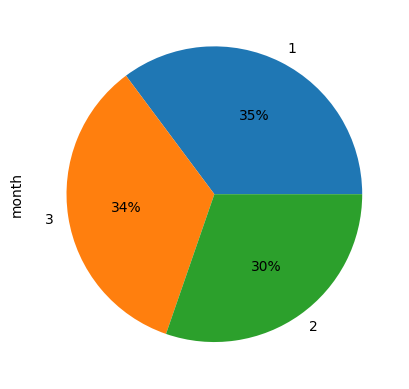

In [151]:
df['month'].value_counts().plot.pie(autopct='%1.00f%%')

In [152]:
# import seaborn as sns
# sns.jointplot(x='month',y='Total',data=df,kind='scatter')

In [153]:
# sns.jointplot(x='month',y='Total',data=df,kind='hex')

In [154]:
# sns.barplot(x='month',y='Total',data=df)

In [155]:
# df['month'].unique()
# df['month'].value_counts()

**The best selling month in terms of number of sales is month 1**

**Nd**

**The best-selling product line in terms of amount is ( ) =>  $**                        
مش عارف اجيب القيمه 

# Ask8 : which time in day we sell more

In [157]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2


In [167]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


## Session details
#### 1) Early Morning =Midnight To 5 AM
#### 2) Morning = 5 AM To 10 AM
#### 3) Day =10 AM To 5 PM
#### 4) Evening =5 PM To 10 PM
#### 5) Last Night =10 PM To Midnight

In [158]:
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5<=x<=10:
        return "Morning"
    elif 10<=x<=17:
        return "Day Time"
    elif 17<= x <=22:
        return "Evening"
    else:
        return "Last Night"

In [160]:
df['part_of_day']=df['Time'].apply(lambda x : time_period(x))

df.head(10)

TypeError: ignored

# Ask9 : Net profit of each branch is the more great

In [169]:
df['Net_profit']=df['Total']-df['cogs']

In [170]:
df.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,Net_profit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,26.1415
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,3.8200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,16.2155
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,23.2880


In [171]:
type_branch= df.groupby('Branch')

In [174]:
type_branch['Net_profit'].sum()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: Net_profit, dtype: float64

**Branch C Got the highest profit**

# Ask10 : The branch with the highest total rating

In [175]:
type_branch= df.groupby('Branch')

In [176]:
type_branch['Rating'].sum()

Branch
A    2389.2
B    2263.6
C    2319.9
Name: Rating, dtype: float64

**Branch A Got the highest rating**